<h2 style='color:blue' align='center'>L1 and L2 Regularization</h2>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

**We are going to use Melbourne House Price Dataset where we'll predict House Predictions based on various features.**
#### The Dataset Link is
https://www.kaggle.com/anthonypino/melbourne-housing-market

In [4]:
# read dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/hirdeshiitkgp/Data/refs/heads/main/Melbourne_housing_FULL.csv')

In [5]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
dataset.nunique()

,0
Suburb,351
Address,34009
Rooms,12
Type,3
Price,2871
Method,9
SellerG,388
Date,78
Distance,215
Postcode,211


In [7]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [8]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [9]:
dataset.shape

(34857, 15)

#### Checking for Nan values

In [10]:
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


#### Handling Missing values

In [11]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

**Drop NA values of Price, since it's our predictive variable we won't impute it**

In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset.shape

(27244, 15)

#### Let's one hot encode the categorical features

In [29]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [30]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


#### Let's bifurcate our dataset into train and test dataset

In [31]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

#### Let's train our Linear Regression Model on training dataset and check the accuracy on test set

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [21]:
reg.score(test_X, test_y)

0.1385368316165222

In [22]:
reg.score(train_X, train_y)

0.6827792395792723

**Here training score is 68% but test score is 13.85% which is very low**

<h4 style='color:purple'>Normal Regression is clearly overfitting the data, let's try other models</h4>

#### Using Lasso (L1 Regularized) Regression Model

In [23]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [24]:
lasso_reg.score(test_X, test_y)

0.6636111369404489

In [25]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

#### Using Ridge (L2 Regularized) Regression Model

In [26]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [27]:
ridge_reg.score(test_X, test_y)

0.6670848945194958

In [28]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

**We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too**

# ElasticNet model

In [38]:

from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet model
elasticnet_reg = ElasticNet(alpha=1, l1_ratio=0.5) # Adjust alpha and l1_ratio as needed
elasticnet_reg.fit(train_X, train_y)

# Evaluate the model
print("ElasticNet R^2 on test data:", elasticnet_reg.score(test_X, test_y))
print("ElasticNet R^2 on training data:", elasticnet_reg.score(train_X, train_y))


ElasticNet R^2 on test data: 0.5187295979749866
ElasticNet R^2 on training data: 0.5057860360064248


# lasso for feature selection


In [45]:
# prompt: lasso for feature selection

import pandas as pd
# Get the coefficients from the Lasso model
lasso_coefficients = lasso_reg.coef_

# Create a DataFrame to display the coefficients with their corresponding feature names
feature_names = X.columns
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Sort the DataFrame by the absolute value of the coefficients
lasso_coef_df['Abs_Coefficient'] = lasso_coef_df['Coefficient'].abs()
lasso_coef_df = lasso_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print or display the DataFrame
print(lasso_coef_df)

# Identify features with non-zero coefficients (selected features)
selected_features = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]['Feature'].tolist()
print("\nSelected Features (non-zero coefficients):", selected_features)


Selected features: Index(['Rooms', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       ...
       'CouncilArea_Melbourne City Council', 'CouncilArea_Melton City Council',
       'CouncilArea_Monash City Council',
       'CouncilArea_Moonee Valley City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council'],
      dtype='object', length=348)


#Ridge and Lasso Regression in Python
**Objective**:
- Understand how Ridge and Lasso regression work by applying them to a dataset, comparing their performance and coefficients.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
# Generate data with 100 samples and 10 features
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [49]:
models = {'Linear Regression': lr, 'Ridge Regression': ridge, 'Lasso Regression': lasso}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}")


Linear Regression - Mean Squared Error: 102.66
Ridge Regression - Mean Squared Error: 127.60
Lasso Regression - Mean Squared Error: 104.93


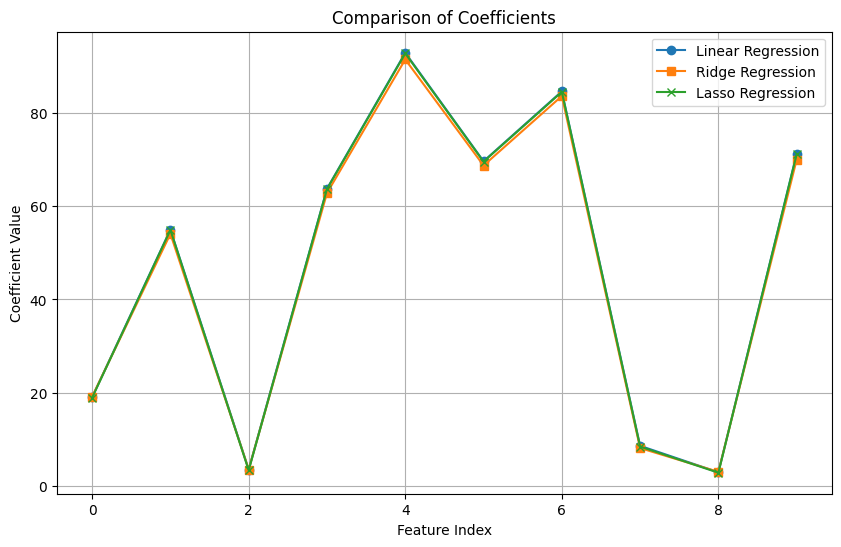

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(lr.coef_, label='Linear Regression', marker='o')
plt.plot(ridge.coef_, label='Ridge Regression', marker='s')
plt.plot(lasso.coef_, label='Lasso Regression', marker='x')
plt.title('Comparison of Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

##Tasks:
- Try changing the alpha parameter in Ridge and Lasso to see how it affects the results.

- Increase the number of irrelevant features and observe how Lasso handles feature selection.

- Print how many coefficients are zero in Lasso (hint: np.sum(lasso.coef_ == 0)).